<a href="https://colab.research.google.com/github/bryanvilcamarchand/CarPricePrediction/blob/master/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install kds # kds - KeyToDataScience Visualization Library

In [188]:
# Import libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.legend_handler import HandlerBase
import seaborn as sns
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor


from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score #,plot_roc_curve  # for classification

import kds
import io

In [ ]:
# Import data
df = pd.read_csv('/content/drive/MyDrive/Python/Car Price Prediction/car data.csv')

In [ ]:
#Explore dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#Check the shape
df.shape

(301, 9)

In [ ]:
# Explore data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Driven_kms'}>],
       [<Axes: title={'center': 'Owner'}>, <Axes: >]], dtype=object)

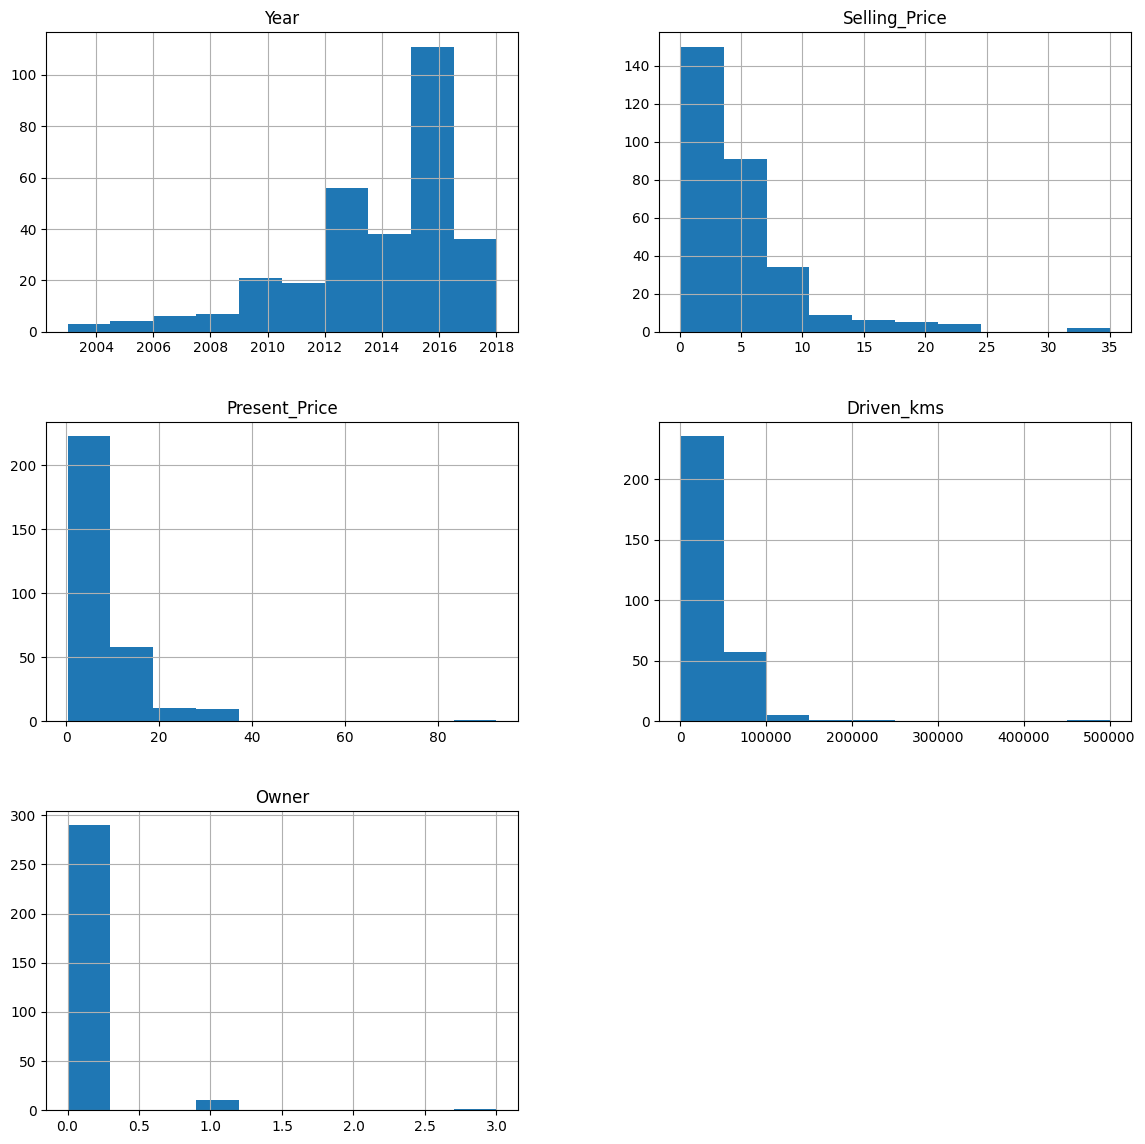

In [ ]:
df.hist(figsize=(14,14)) #general view about distribution for each feature

In [ ]:
## For cuantitative features
def plot_num(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=feature,ax=axes[0])
    sns.distplot(a=df[feature],ax=axes[1],color='red')
    fig.set_size_inches(15,5)

<ipython-input-37-1d2841f62998>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df[feature],ax=axes[1],color='red')


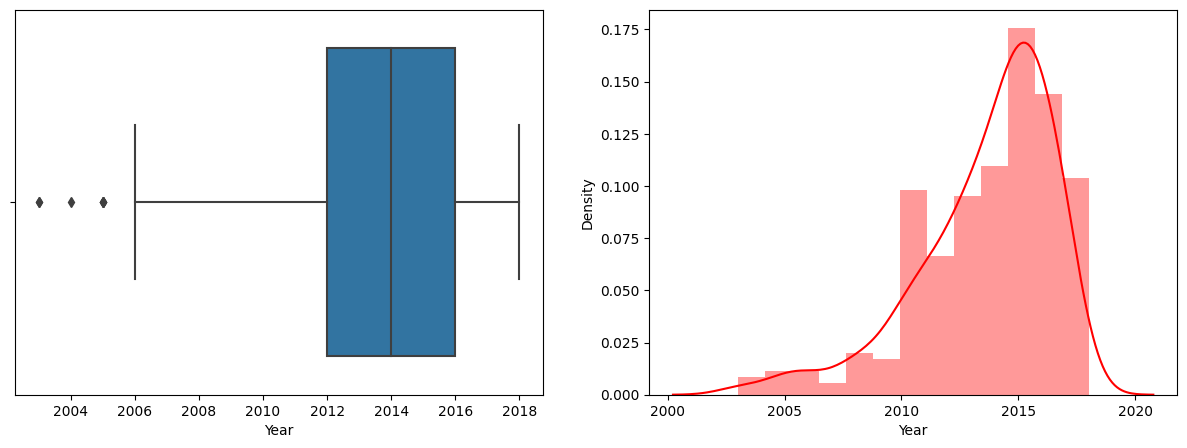

In [ ]:
plot_num('Year')

<ipython-input-25-1d2841f62998>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df[feature],ax=axes[1],color='red')


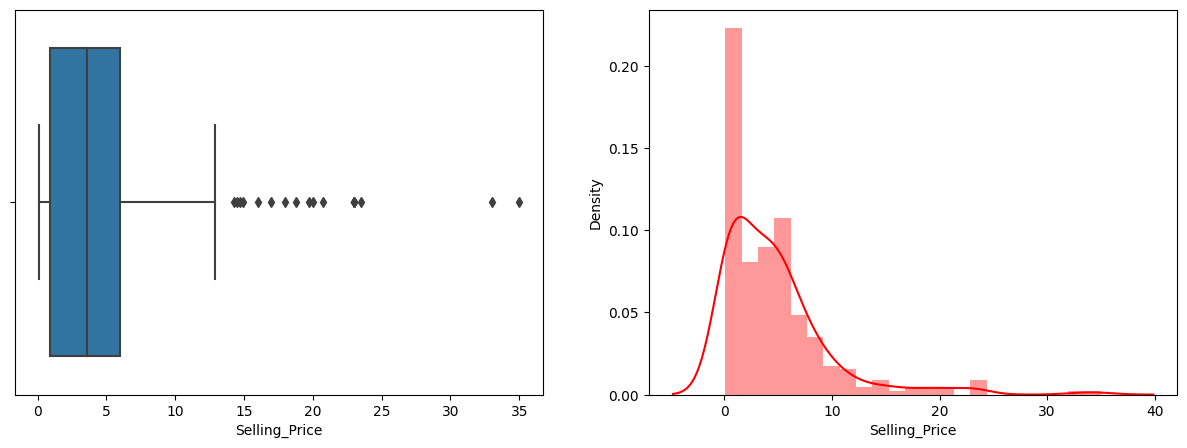

In [ ]:
plot_num('Selling_Price')

<ipython-input-25-1d2841f62998>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df[feature],ax=axes[1],color='red')


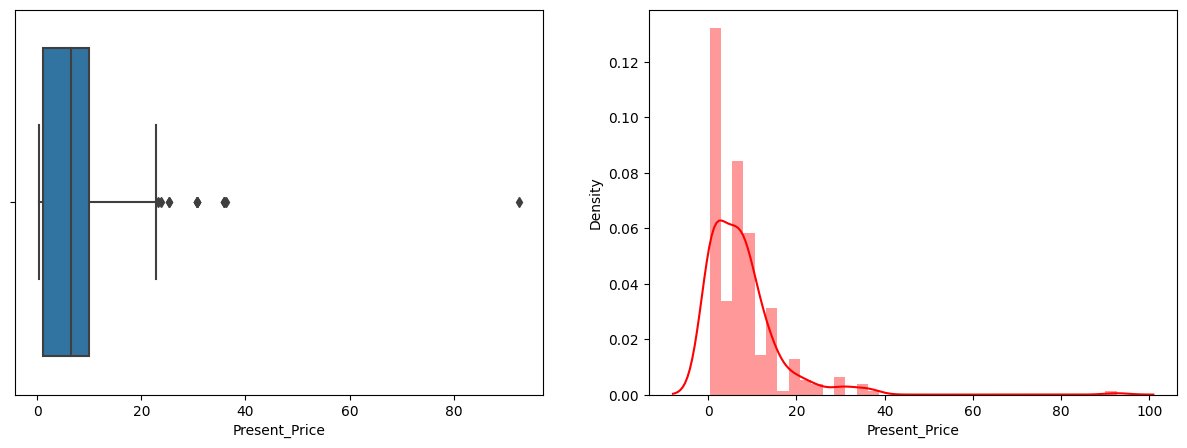

In [ ]:
plot_num('Present_Price')

<ipython-input-25-1d2841f62998>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df[feature],ax=axes[1],color='red')


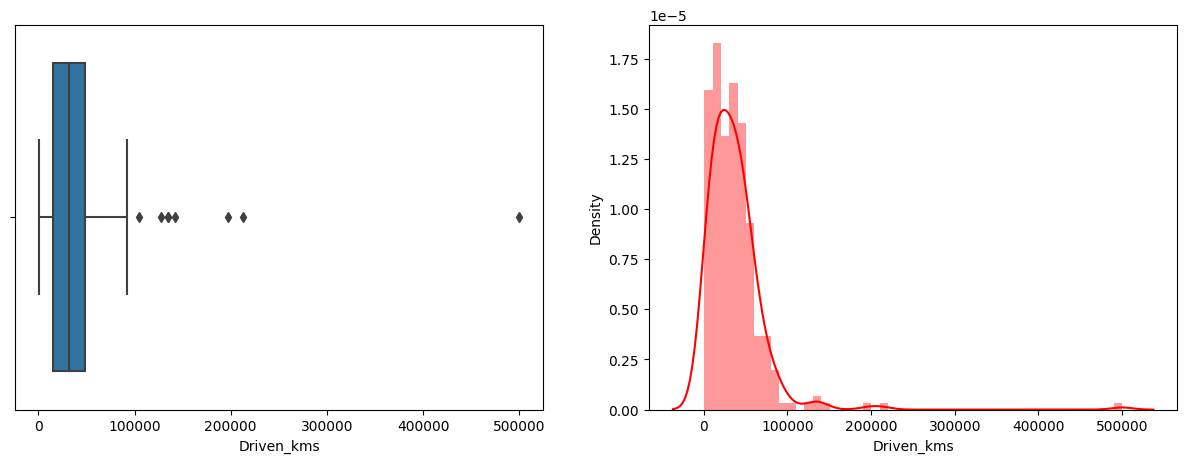

In [ ]:
plot_num('Driven_kms')

<ipython-input-25-1d2841f62998>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df[feature],ax=axes[1],color='red')


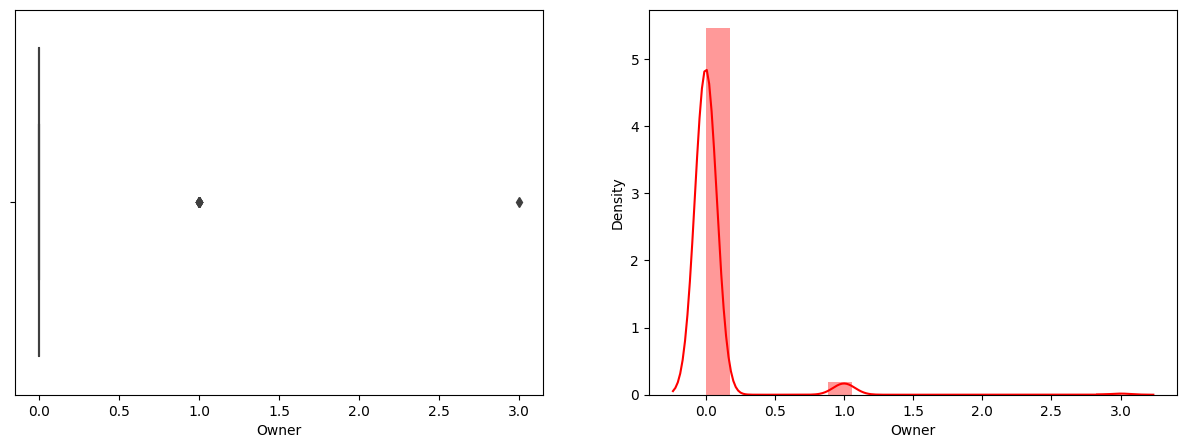

In [ ]:
plot_num('Owner')

<Axes: ylabel='Selling_Price'>

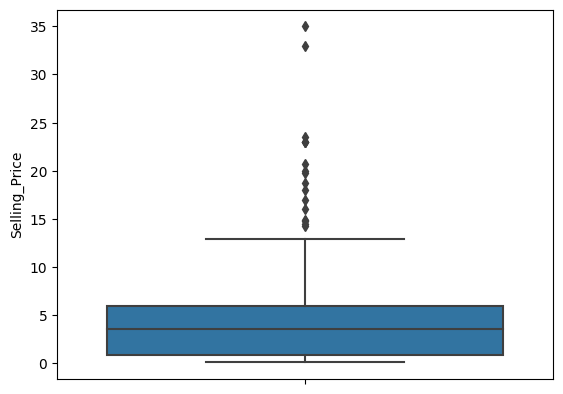

In [ ]:
# Análisis del Target
sns.boxplot(y="Selling_Price", data=df) # sns es seaborn, boxplot generar grafica de cajas

We have some outliers, for the first model version we will to use all of them, for the next models we have to clean it.

In [ ]:
# Analize cualitative features
df.describe(include=['O'])

,Car_Name,Fuel_Type,Selling_type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [ ]:
df["Car_Name"].value_counts() # Count

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [ ]:
df["Car_Name"].unique() #unique() Show unique values for each feature

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [ ]:
df["Fuel_Type"].value_counts(normalize = True) *100

Petrol    79.401993
Diesel    19.933555
CNG        0.664452
Name: Fuel_Type, dtype: float64

In [ ]:
df["Selling_type"].value_counts(normalize = True) *100

Dealer        64.784053
Individual    35.215947
Name: Selling_type, dtype: float64

In [ ]:
df["Transmission"].value_counts(normalize = True) *100

Manual       86.710963
Automatic    13.289037
Name: Transmission, dtype: float64

<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

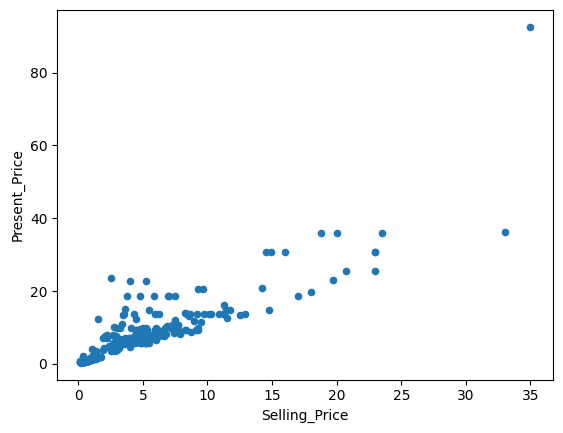

In [ ]:
df.plot.scatter(x="Selling_Price", y="Present_Price") # scatter analize

This feature has a positive relationship increasing

<Axes: xlabel='Selling_Price', ylabel='Driven_kms'>

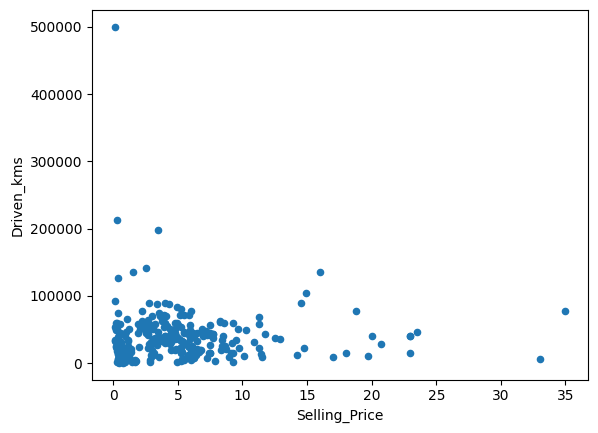

In [ ]:
df.plot.scatter(x="Selling_Price", y="Driven_kms") # scatter anaize

These features hasn't a clear relationship

# Split data

In [ ]:
df_x = df.drop('Selling_Price',axis=1)
df_y = df['Selling_Price']

In [ ]:
df_x.head()

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df_y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [ ]:
# Create a new feature: antiquity

df_x = df_x.drop('Car_Name',axis=1)
df_x['current_year'] = 2023
df_x['antiquity'] = df_x['current_year'] - df_x['Year']

In [ ]:
df_x.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,current_year,antiquity
0,2014,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [ ]:
# Drop columns
df_x = df_x.drop('Year',axis=1)
df_x = df_x.drop('current_year',axis=1)

In [ ]:
df_x.head()

,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,antiquity
0,5.59,27000,Petrol,Dealer,Manual,0,9
1,9.54,43000,Diesel,Dealer,Manual,0,10
2,9.85,6900,Petrol,Dealer,Manual,0,6
3,4.15,5200,Petrol,Dealer,Manual,0,12
4,6.87,42450,Diesel,Dealer,Manual,0,9


<ipython-input-133-16d462a055d8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_x.corr(), annot = df_x.corr()) # .corr() calcula el coeficiente de correlacion de pearson


<Axes: >

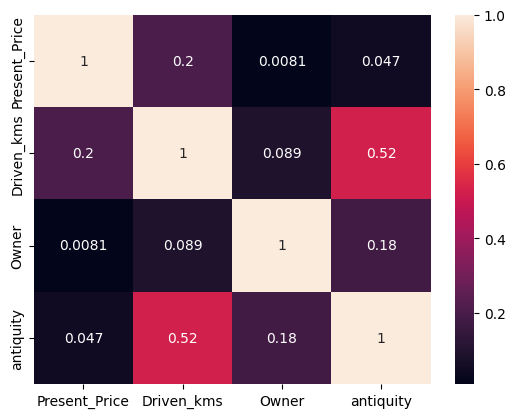

In [ ]:
sns.heatmap(df_x.corr(), annot = df_x.corr()) # .corr() pearson correlation

There is a high correlation between the features Drivens_kms and antiquity. It could generate a multicolinealty problem. For the next verison model we have to drop one of them.

In [ ]:
df_x.columns

Index(['Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type',
       'Transmission', 'Owner', 'antiquity'],
      dtype='object')

In [ ]:
# One-hot encoder

df_x = pd.get_dummies(df_x, columns=['Fuel_Type', 'Selling_type', 'Transmission'])


In [ ]:
# Label Encoder

#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#df_x['Fuel_Type']=le.fit_transform(df_x['Fuel_Type'])
#df_x['Selling_type']=le.fit_transform(df_x['Selling_type'])
#df_x['Transmission']=le.fit_transform(df_x['Transmission'])
#df_x.head()

In [ ]:
df_x.head()

,Present_Price,Driven_kms,Owner,antiquity,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,5.59,27000,0,9,0,0,1,1,0,0,1
1,9.54,43000,0,10,0,1,0,1,0,0,1
2,9.85,6900,0,6,0,0,1,1,0,0,1
3,4.15,5200,0,12,0,0,1,1,0,0,1
4,6.87,42450,0,9,0,1,0,1,0,0,1


<Axes: >

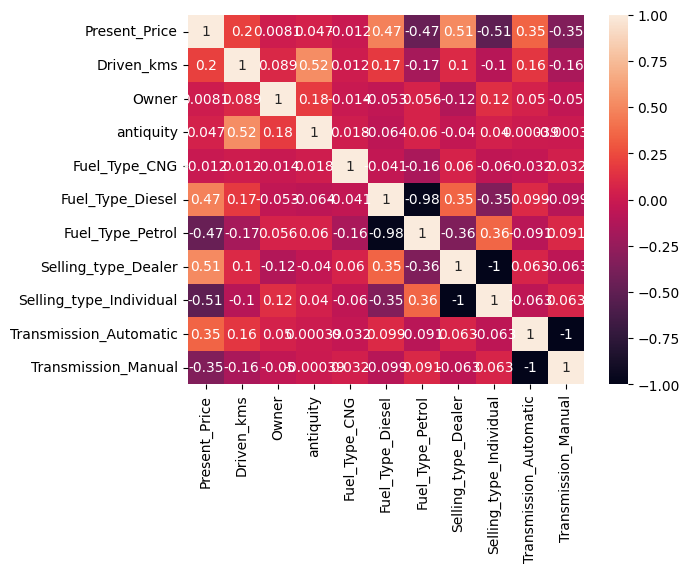

In [ ]:
sns.heatmap(df_x.corr(), annot = df_x.corr()) # .corr()

In [ ]:
# Features selection using Random Forest

#forest = RandomForestClassifier(n_jobs=-1)
forest=ExtraTreesRegressor()
forest.fit(df_x,df_y) # el primer elemento son mis variables independientes y el segundo mi dependiente.
importances = forest.feature_importances_  # Capacidad de cada variable para mejorar la capacidad predictiva del modelo cuando se tienen presencia o ausencia en las ramas del árbol.

In [ ]:
# Create a dataset with the names of features and their level impact about the target
TablaImportancia = pd.concat([pd.DataFrame({'Driver':list(df_x.columns)}),
                              pd.DataFrame({'Importancia':list(forest.feature_importances_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables

,Driver,Importancia
0,Present_Price,0.385641
1,Fuel_Type_Diesel,0.232222
2,Selling_type_Dealer,0.122091
3,Transmission_Manual,0.083033
4,antiquity,0.072612
5,Transmission_Automatic,0.052805
6,Driven_kms,0.043626
7,Fuel_Type_Petrol,0.005972
8,Selling_type_Individual,0.001430
9,Owner,0.000505


In [ ]:
# StandarScaler features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_x)
df_x_final = pd.DataFrame(data=df_x_scaled, columns = df_x.columns)

In [ ]:
df_x_final

,Present_Price,Driven_kms,Owner,antiquity,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,-0.236256,-0.256224,-0.174501,-0.128897,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148
1,0.221544,0.155911,-0.174501,0.217514,-0.081786,2.004162,-1.963374,0.737285,-0.737285,-0.39148,0.39148
2,0.257472,-0.773969,-0.174501,-1.168129,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148
3,-0.403151,-0.817758,-0.174501,0.910335,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148
4,-0.087906,0.141743,-0.174501,-0.128897,-0.081786,2.004162,-1.963374,0.737285,-0.737285,-0.39148,0.39148
...,...,...,...,...,...,...,...,...,...,...,...
296,0.460295,-0.076225,-0.174501,-0.821718,-0.081786,2.004162,-1.963374,0.737285,-0.737285,-0.39148,0.39148
297,-0.200328,0.593804,-0.174501,-0.475308,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148
298,0.390756,1.313340,-0.174501,1.603156,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148
299,0.564604,-0.719876,-0.174501,-1.168129,-0.081786,2.004162,-1.963374,0.737285,-0.737285,-0.39148,0.39148


In [ ]:
df_x_final.shape

(301, 11)

## Split data for the model

In [ ]:
# Split data train, test
X_train, X_test, y_train, y_test = train_test_split(df_x_final, df_y, test_size=0.3, random_state=2)

In [200]:
 # Function to play different models and obtain the metrics MSE, MAE to evaluates them.

def apply_models(models, X_train, X_test, y_train, y_test):
  """
  This function applies different machine learning models to the given data and returns the MSE and MAE for each model.

  Args:
    models: A list of machine learning models to apply.
    X_train: The training data.
    X_test: The test data.
    y_train: The training labels.
    y_test: The test labels.

  Returns:
    A dictionary of the MSE and MAE for each model.
  """

  results = {}
  for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    results[model.__class__.__name__] = {
        "MSE": mse,
        "MAE": mae,
    }
  return results

In [201]:
# Apply models

models = [
    #LinearRegression(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    DecisionTreeRegressor(),
]

results = apply_models(models, X_train, X_test, y_train, y_test)

for model_name, result in results.items():
  print(f"{model_name}: MSE = {result['MSE']}, MAE = {result['MAE']}")


RandomForestRegressor: MSE = 0.6936412741758248, MAE = 0.489693406593407
GradientBoostingRegressor: MSE = 0.8074362982639602, MAE = 0.5163610196882006
DecisionTreeRegressor: MSE = 0.890854945054945, MAE = 0.5580219780219781


The best model is RandomForestRegressor